[**Demo %s**](#demo-int-trap)

We will approximate the integral of the function $f(x)=e^{\sin 7x}$ over the interval $[0,2]$.

In [11]:
f = @(x) exp(sin(7 * x));
a = 0;  b = 2;

In lieu of the exact value, we use the `integral` function to find an accurate result.

In [12]:
I = integral(f, a, b, abstol=1e-14, reltol=1e-14);
fprintf("Integral = %.15f", I)

Integral = 2.663219782761539

Here is the trapezoid result at $n=40$, and its error.

In [13]:
T = trapezoid(f, a, b, 40);
fprintf("Trapezoid error = %.2e", I - T)

Trapezoid error = 9.17e-04

In order to check the order of accuracy, we increase $n$ by orders of magnitude and observe how the error decreases.

In [14]:
n = 10 .^ (1:5)';
err = zeros(size(n));
for i = 1:length(n)
    T = trapezoid(f, a, b, n(i));
    err(i) = I - T;
end
disp(table(n, err, variableNames=["n", "Trapezoid error"]))

      n      Trapezoid error
    _____    _______________

       10        0.012025   
      100       0.0001473   
     1000      1.4742e-06   
    10000      1.4742e-08   
    1e+05      1.4742e-10   



Each increase by a factor of 10 in $n$ cuts the error by a factor of about 100, which is consistent with second-order convergence. Another check is that a log-log graph should give a line of slope $-2$ as $n\to\infty$.

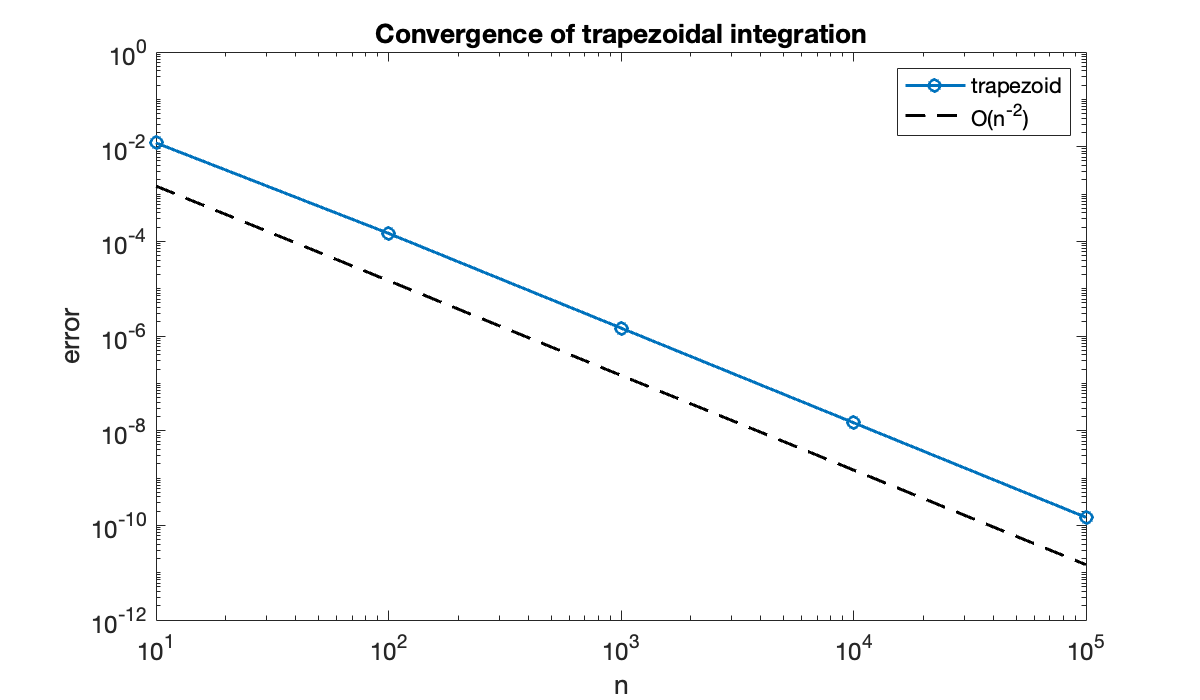

In [15]:
clf
loglog(n, abs(err), "-o", displayname="trapezoid")
hold on
loglog(n, 0.1 * abs(err(end)) * (n / n(end)).^(-2), "k--", displayname="O(n^{-2})")
xlabel("n");  ylabel("error")
title("Convergence of trapezoidal integration")
legend();